## Deep Regresion

### Load Dataset from Sklearn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

/home/dhkang/data3/work/AI_Study/ML-AI_Study/dlenv/lib/python3.12/site-packages/sklearn/datasets/_openml.py:324: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


### Standard-Scaler

In [6]:
'''
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1])
'''

scaler = StandardScaler()
df.loc[:, df.columns != 'TARGET'] = scaler.fit_transform(df.loc[:, df.columns != 'TARGET'])
df.tail()

/tmp/ipykernel_358787/3517555607.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857 -0.27259857
 -0.27259857 -0.27259857 -0.27259857 -0.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,11.9


### Train Model with PYTorch

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
data = torch.from_numpy(df.values).float().cuda()
print(f"data.shape: {data.shape}")

data.shape: torch.Size([506, 14])


In [9]:
y = data[:, -1:]
x = data[:, :-1]

print(f"x.shape: {x.shape}, y.shape: {y.shape}")

x.shape: torch.Size([506, 13]), y.shape: torch.Size([506, 1])


In [10]:
n_epochs = 100000
learning_rate = 1e-4
print_interval = 5000

### Build Models

#### Build Model using nn.Module

In [11]:
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(0.1)

In [12]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        super().__init__()
        
        self.linear1 = nn.Linear(input_dim, 3).cuda()
        self.linear2 = nn.Linear(3, 3).cuda()
        self.linear3 = nn.Linear(3, output_dim).cuda()
        self.act = nn.ReLU().cuda()
        
    def forward(self, x):
        ## |X| = (batch_size, input_dim)
        h = self.act(self.linear1(x))   ## |h| = (batch_size, 3)
        h = self.act(self.linear2(h))
        y = self.linear3(h) ## |y| = (batch_size, output_dim)
        
        return y 

In [13]:
model = MyModel(x.size(-1), y.size(-1)).cuda()
model

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

### Build Model with LeakyReLU using nn.Sequential

In [14]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)),
).cuda()

model

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=3, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=3, out_features=1, bias=True)
)

In [15]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i+1, loss))

Epoch 5000: loss=8.4437e+01
Epoch 10000: loss=8.4428e+01
Epoch 15000: loss=8.4422e+01
Epoch 20000: loss=8.4416e+01
Epoch 25000: loss=8.4409e+01
Epoch 30000: loss=8.4400e+01
Epoch 35000: loss=8.4384e+01
Epoch 40000: loss=1.3018e+01
Epoch 45000: loss=9.3516e+00
Epoch 50000: loss=8.8060e+00
Epoch 55000: loss=8.6346e+00
Epoch 60000: loss=8.4424e+00
Epoch 65000: loss=8.3653e+00
Epoch 70000: loss=8.2623e+00
Epoch 75000: loss=8.2328e+00
Epoch 80000: loss=8.2168e+00
Epoch 85000: loss=8.1709e+00
Epoch 90000: loss=8.1581e+00
Epoch 95000: loss=8.1495e+00
Epoch 100000: loss=8.1430e+00


### Let's check the result

/home/dhkang/data3/work/AI_Study/ML-AI_Study/dlenv/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


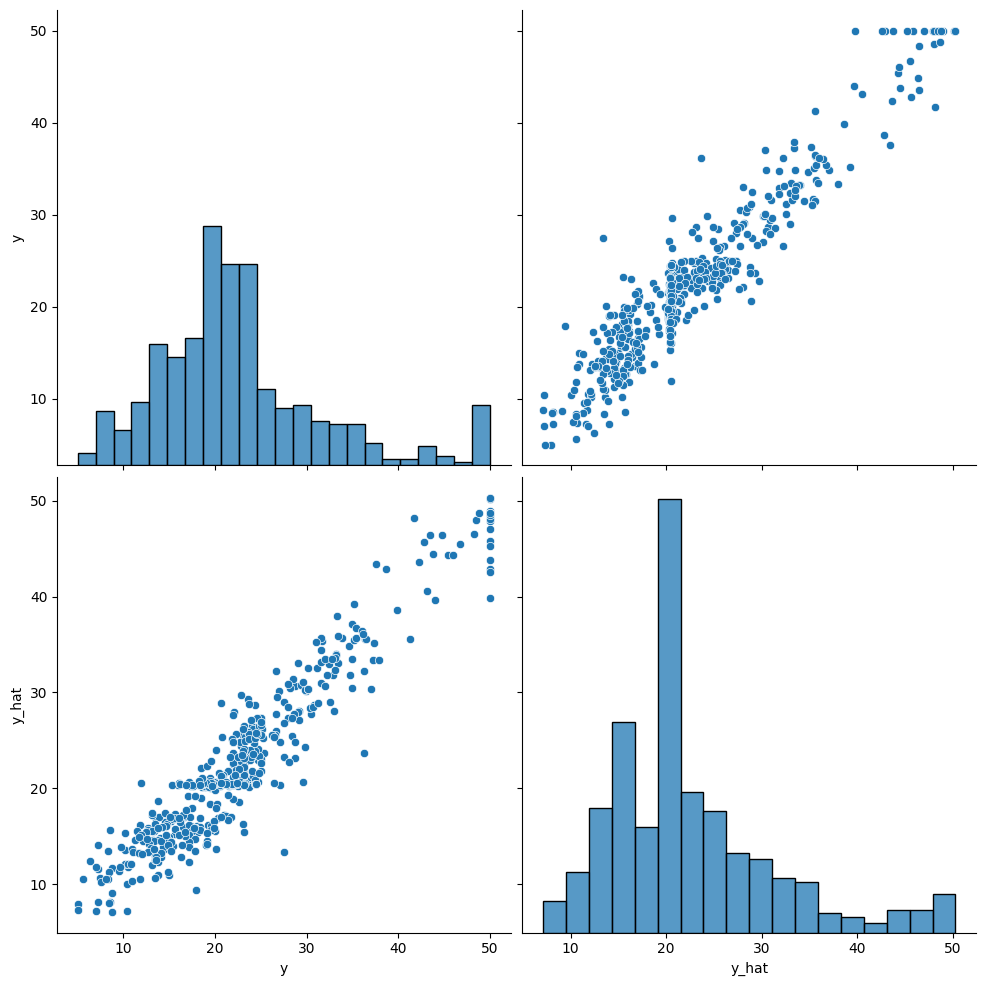

In [17]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).cpu().detach().numpy(), columns=['y', 'y_hat'])
sns. pairplot(df, size=5)
plt.show()